# 数据读取进入DataSet和Dataload

##### 首先，我们的数据文件夹下是很多图片以及一个excel文件，内容如下：
`image_name,part_0_x,part_0_y,part_1_x,part_1_y,part_2_x, ... ,part_67_x,part_67_y
0805personali01.jpg,27,83,27,98, ... 84,134
1084239450_e76e00b7e7.jpg,70,236,71,257, ... ,128,312`

第一行是标签，从第二行开始是一张图片对应的各种特征点信息

In [1]:
# 首先我们来读取数据
import pandas as pd

In [2]:
landmarks_frame = pd.read_csv('faces/face_landmarks.csv')

In [4]:
landmarks_frame.head()

,image_name,part_0_x,part_0_y,part_1_x,part_1_y,part_2_x,part_2_y,part_3_x,part_3_y,part_4_x,...,part_63_x,part_63_y,part_64_x,part_64_y,part_65_x,part_65_y,part_66_x,part_66_y,part_67_x,part_67_y
0,0805personali01.jpg,27,83,27,98,29,113,33,127,39,...,93,136,100,141,93,135,89,135,84,134
1,1084239450_e76e00b7e7.jpg,70,236,71,257,75,278,82,299,90,...,148,311,179,308,149,312,137,314,128,312
2,10comm-decarlo.jpg,66,114,65,128,67,142,68,156,72,...,128,162,136,167,127,166,121,165,116,164
3,110276240_bec305da91.jpg,42,140,45,161,51,180,61,200,73,...,144,197,180,189,147,204,136,208,125,209
4,1198_0_861.jpg,138,392,141,427,145,464,152,501,166,...,293,507,331,511,294,516,279,518,265,516


In [5]:
landmarks_frame.shape

(69, 137)

In [6]:
## 先看看第66个数据是怎么样的
img_name = landmarks_frame.ix[65,0]
landmarks = landmarks_frame.ix[65,1:].as_matrix().astype('float')
landmarks = landmarks.reshape(-1, 2)

/Users/haxu/anaconda3/envs/deep-learning/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  


In [7]:
img_name

'person-7.jpg'

In [8]:
landmarks.shape

(68, 2)

In [9]:
from matplotlib import pyplot as plt
%matplotlib inline

In [37]:
def show_landmarks(image,land):
    plt.imshow(image)
    plt.scatter(land[:,0],land[:,1],s=10, marker='.', c='r')
    plt.pause(0.001)

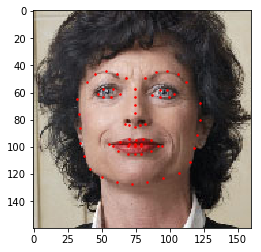

In [38]:
from skimage import io
import os
plt.figure()
show_landmarks(io.imread(os.path.join('faces/', img_name)),landmarks)
plt.show()

### 设置Dataset

In [39]:
from torch.utils.data import Dataset,DataLoader

In [44]:
class FaceLandmarksDataset(Dataset):
    def __init__(self,csv_file,root_dir,transform=None):
        self.landmarks_frame = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform
    def __len__(self):
        return len(self.landmarks_frame)
    def __getitem__(self,idx):
        img_name = os.path.join(self.root_dir,self.landmarks_frame.ix[idx,0])
        image = io.imread(img_name)
        landmarks = self.landmarks_frame.ix[idx,1:].as_matrix().astype('float')
        landmarks = landmarks.reshape(-1, 2)
        samples = {'image':image,'land':landmarks}
        if self.transform:
            samples = self.transform(samples)
        return samples

In [45]:
faces = FaceLandmarksDataset('faces/face_landmarks.csv','faces/')

In [46]:
fig = plt.figure()

0 (324, 215, 3) (68, 2)
1 (500, 333, 3) (68, 2)
2 (250, 258, 3) (68, 2)
3 (434, 290, 3) (68, 2)


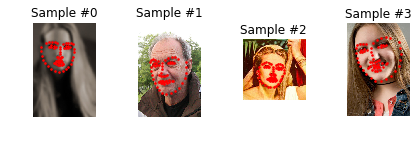

In [50]:
for i in range(len(faces)):
    sample = faces[i]
    print(i, sample['image'].shape, sample['land'].shape)
    ax = plt.subplot(1, 4, i + 1)
    plt.tight_layout()
    ax.set_title('Sample #{}'.format(i))
    ax.axis('off')
    show_landmarks(**sample)
    if i == 3:
        plt.show()
        break

## 现在我们学会了如何自己做一个数据集，但是torchvision提供了常用的方法给我们

In [51]:
from torchvision import datasets

In [54]:
data = datasets.ImageFolder(root='train')

In [59]:
for d in data:
    image,label = d
    print(image,label)

<PIL.Image.Image image mode=RGB size=1308x778 at 0x119D4CE48> 0
<PIL.Image.Image image mode=RGB size=1320x528 at 0x119D3EAC8> 0
<PIL.Image.Image image mode=RGB size=1288x330 at 0x119D4C4E0> 1
<PIL.Image.Image image mode=RGB size=1120x684 at 0x119D3E400> 1
<PIL.Image.Image image mode=RGB size=1346x362 at 0x119D4C4E0> 1
